In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision
from PIL import Image
from torch import optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from glob import glob
from torchvision import datasets, transforms, models
from torchvision.datasets import ImageFolder
import numpy as np
from torchvision.transforms import transforms

from tqdm import tqdm

!pip install matplotlib pandas

In [2]:
!pip install scikit-learn

Downloading and Loading the pre processed datasets. Merge them together using Concatenate dataset.

In [125]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=FILEID' -O- | sed -rn 's/.confirm=([0-9A-Za-z_]+)./\1\n/p')&id=1-3QUz3mLbMtIAeq_7UYZsN-_HLDTv6Xp" -O '31_41.pt' && rm -rf /tmp/cookies.txt

--2023-05-15 20:35:07--  https://docs.google.com/uc?export=download&confirm=&id=1-3QUz3mLbMtIAeq_7UYZsN-_HLDTv6Xp
Resolving docs.google.com (docs.google.com)... 172.217.161.206, 2404:6800:400a:805::200e
Connecting to docs.google.com (docs.google.com)|172.217.161.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lt3i7h58th7agoi94nsj2253thb6r1bg/1684182900000/00126560755885081018/*/1-3QUz3mLbMtIAeq_7UYZsN-_HLDTv6Xp?e=download&uuid=d2b7c12a-a2de-4e6a-b48d-44bdd3556c53 [following]
--2023-05-15 20:35:08--  https://doc-0k-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lt3i7h58th7agoi94nsj2253thb6r1bg/1684182900000/00126560755885081018/*/1-3QUz3mLbMtIAeq_7UYZsN-_HLDTv6Xp?e=download&uuid=d2b7c12a-a2de-4e6a-b48d-44bdd3556c53
Resolving doc-0k-94-docs.googleusercontent.com (doc-0k-94-docs.googleusercontent.com)... 172.217.161.225, 2404:6800

In [8]:
!sudo apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  zip
The following NEW packages will be installed:
  unzip
0 upgraded, 1 newly installed, 0 to remove and 44 not upgraded.
Need to get 168 kB of archives.
After this operation, 567 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 unzip amd64 6.0-21ubuntu1.2 [168 kB]
Fetched 168 kB in 1s (116 kB/s) 
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package unzip.
(Reading database ... 13495 files and directories currently installed.)
Preparing to unpack .../unzip_6.0-21ubuntu1.2_amd64.deb ...
Unpacking unzip (6.0-21ubuntu1.2) ...
Setting up unzip (6.0-21ubuntu1.2) ...
Processing triggers for mime-support (3.60ubuntu1) ...


In [158]:
import os

class ImageDatasetVGG(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None):
        self.img_labels = annotations_file
        self.img_dir = img_dir
        self.transform = transform
        self.pairs = list()

        for idx in tqdm(range(len(annotations_file))):

            img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
            image = Image.open(img_path).convert('RGB') ## this is being done because before we were dealing just with greyscale images 😦
            label = self.img_labels.iloc[idx, 1]

            image = self.transform(image)
            self.pairs.append((image, label))



    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        pair = self.pairs[idx]
        
        print(os.path.join(self.img_dir, self.img_labels.iloc[idx, 0]))

        image, label = pair[0], pair[1]
        return image, label

In [160]:
data1 = torch.load('firstslice.pt')
#data2 = torch.load('from_40.pt')
#data3 = torch.load('21_31.pt')
#data4 = torch.load('31_41.pt')
#data5 = torch.load()

In [161]:
data1[1]

/content/4ba6bf60270210.jpg


(tensor([[[0.5137, 0.5020, 0.6706,  ..., 0.7059, 0.7725, 0.7294],
          [0.5686, 0.5529, 0.9333,  ..., 0.6314, 0.6353, 0.6392],
          [0.5373, 0.6431, 0.9529,  ..., 0.5725, 0.5333, 0.5412],
          ...,
          [0.9412, 0.9490, 0.9490,  ..., 0.4667, 0.6039, 0.8000],
          [0.9176, 0.9373, 0.9412,  ..., 0.8549, 0.8745, 0.9020],
          [0.8784, 0.8980, 0.9216,  ..., 0.9843, 0.9882, 0.9882]],
 
         [[0.6235, 0.6275, 0.7490,  ..., 0.7882, 0.8314, 0.7843],
          [0.6784, 0.6627, 0.9529,  ..., 0.7294, 0.7333, 0.7333],
          [0.6431, 0.7294, 0.9647,  ..., 0.6667, 0.6353, 0.6510],
          ...,
          [0.9373, 0.9412, 0.9412,  ..., 0.4902, 0.6353, 0.8157],
          [0.9137, 0.9294, 0.9333,  ..., 0.8549, 0.8863, 0.9020],
          [0.8706, 0.8941, 0.9137,  ..., 0.9843, 0.9882, 0.9882]],
 
         [[0.7608, 0.7569, 0.8235,  ..., 0.8980, 0.9137, 0.8824],
          [0.8000, 0.7804, 0.9647,  ..., 0.8471, 0.8588, 0.8471],
          [0.7725, 0.8392, 0.9765,  ...,

In [129]:
DATA = torch.utils.data.ConcatDataset([data1, data2, data3, data4])

In [130]:
val_size = int(len(DATA) - len(DATA)*0.8)

In [131]:
image_train, image_val = torch.utils.data.random_split(DATA, (len(DATA)- val_size, val_size)) 

In [142]:
len(DATA)

35033

In [118]:
image_train[1]

(tensor([[[0.7804, 0.7725, 0.7608,  ..., 0.6784, 0.6627, 0.6471],
          [0.7529, 0.7255, 0.7098,  ..., 0.7216, 0.7137, 0.7020],
          [0.7294, 0.7098, 0.7059,  ..., 0.7373, 0.7333, 0.7216],
          ...,
          [0.6824, 0.6784, 0.6745,  ..., 0.5569, 0.5569, 0.5647],
          [0.6471, 0.6471, 0.6471,  ..., 0.5647, 0.5686, 0.5765],
          [0.6235, 0.6235, 0.6235,  ..., 0.5843, 0.5882, 0.5922]],
 
         [[0.7569, 0.7569, 0.7529,  ..., 0.6784, 0.6627, 0.6510],
          [0.7451, 0.7255, 0.7098,  ..., 0.7216, 0.7098, 0.6980],
          [0.7294, 0.7098, 0.7098,  ..., 0.7294, 0.7255, 0.7216],
          ...,
          [0.6784, 0.6784, 0.6784,  ..., 0.5569, 0.5608, 0.5608],
          [0.6510, 0.6510, 0.6510,  ..., 0.5647, 0.5686, 0.5686],
          [0.6196, 0.6196, 0.6196,  ..., 0.5804, 0.5843, 0.5882]],
 
         [[0.7608, 0.7608, 0.7529,  ..., 0.6784, 0.6667, 0.6549],
          [0.7412, 0.7255, 0.7098,  ..., 0.7216, 0.7137, 0.7059],
          [0.7294, 0.7098, 0.7098,  ...,

In [133]:
Y = list()
for i in range(len(image_train)):
    Y.append(image_train[i][1])
    
labels_on_train = pd.Series(Y)


In [134]:
unique_new_species = labels_on_train.unique()
train_labels_np = np.array(labels_on_train)

In [135]:
import torch.utils.data as data
from collections import Counter


# calcola il numero di campioni per ogni classe nel set di training
class_counts = Counter(labels_on_train)
n_samples = len(train_labels_np)

# calcola i pesi per ogni classe
weights = [1.0 / class_counts[x] for x in train_labels_np]

# crea un sampler ponderato solo per il set di training
sampler = data.WeightedRandomSampler(weights, n_samples)

In [136]:
train_loader = DataLoader(image_train, batch_size=32, sampler=sampler)
val_loader = DataLoader(image_val, batch_size=32)

In [137]:
class CNN(nn.Module):
    
    
    def __init__(self, num_classes=30):
        super().__init__()
        
        self.ConvLayer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU())
        
        self.ConvLayer2 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.MaxPool2d((2,2)),
            nn.ReLU())
        
        self.ConvLayer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        
        self.ConvLayer4 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.MaxPool2d((2,2)),
            nn.ReLU())
        
        self.ConvLayer5 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),   
            nn.ReLU())
        
        self.ConvLayer6 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.MaxPool2d((2,2)),
            nn.ReLU())
        
       
        
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(12544, 2048),
            nn.ReLU())
        self.fc2 = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(2048, 256),
            nn.ReLU())
        self.fc3 = nn.Sequential(
            nn.Linear(256, num_classes))
        
    
    
    def forward(self, inputs):
        
        x = self.ConvLayer1(inputs)
        x = self.ConvLayer2(x)
        x = self.ConvLayer3(x)
        x = self.ConvLayer4(x)
        x = self.ConvLayer5(x)
        x = self.ConvLayer6(x)

        x = x.reshape(x.size(0), -1)
        
        
        x = self.fc1(x)
        x = self.fc2(x)
        
        return self.fc3(x)

In [38]:
class VGG16(nn.Module):
    def __init__(self, num_classes=30):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Sequential(
            nn.Dropout(0.01),
            nn.Linear(25088, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.01),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2 = nn.Sequential(
            nn.Linear(4096, num_classes))

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [138]:
#model = VGG16(30)
model = CNN(30)

model.cuda()

CNN(
  (ConvLayer1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (ConvLayer2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
  )
  (ConvLayer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (ConvLayer4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=

In [140]:
loss = nn.CrossEntropyLoss()

criterion = optim.AdamW(model.parameters(), lr=0.00002)

In [15]:
def train(model, loss_f, optim, dataloader):
    
    model.train()
    train_losses = list()
    
    train_loss = 0
    n_batches = len(dataloader)
    
    for i, batch in enumerate(tqdm(dataloader)):
        
        
        imgs, labels = batch[0], batch[1]
        
        labels  = labels.type(torch.LongTensor)
        
        imgs, labels = imgs.cuda(), labels.cuda()
        
        
        ## -- forward pass -- ##
        
        preds = model(imgs)
        
        
        ## -- computing the loss wrt G.T. -- ##
        loss = loss_f(preds, labels)
        
        
        ## -- Backpropagation -- ##
        optim.zero_grad()
        loss.backward()
        optim.step()
        
        
        train_losses.append(loss.item())
        train_loss += loss.item()
        
    print(f"Average TRAIN Loss :: {train_loss/n_batches} ")
    
    return train_loss/n_batches

In [141]:
def test(model, iteratore, loss_f):
    num_batches = len(iteratore)
    test_loss = 0
    accuracy = 0
    
    test_losses = list()
    
    model.eval()
    
    
    with torch.no_grad():
        for i, batch in enumerate(tqdm(iteratore)):

            img, labels = batch[0], batch[1]
            labels  = labels.type(torch.LongTensor)
            img, labels = img.cuda(), labels.cuda()

            pred = model(img)
            loss = loss_f(pred, labels)
            test_loss += loss.item()
            
            
            pred_indices = torch.argmax(pred, dim=1)
            label_test = labels.cpu().float()
            pred_indices = pred_indices.cpu().float()
            distances = torch.where(pred_indices == label_test, torch.tensor(1), torch.tensor(0))
            distances = distances.numpy()
            accuracy += sum(distances)/len(label_test)
            
            
            test_losses.append(loss.item())
            
    test_loss = test_loss / num_batches
    accuracy_tot = accuracy / num_batches
    
    print(f"Average TEST loss: {test_loss}, TEST accuracy: {accuracy_tot*100}%")
    return test_loss

In [153]:
#min_loss = 100

#train_losses = list()
#test_losses = list()

for epoch in range(10):
    print(f"----- epoch {epoch} -----")
    train_losses.append(train(model, loss, criterion, train_loader))
    t_loss = test(model, val_loader, loss)
    
    test_losses.append(t_loss)
    
    if t_loss < min_loss:
        min_loss = t_loss
        torch.save(model, 'checkpoint_cnn_35k_images.pth')
    print("\n")
    

----- epoch 0 -----


100%|██████████| 876/876 [00:21<00:00, 41.55it/s]


Average TRAIN Loss :: 0.09187228396666751 


100%|██████████| 219/219 [00:01<00:00, 118.03it/s]


Average TEST loss: 0.44360331796347824, TEST accuracy: 87.32686453576865%


----- epoch 1 -----


100%|██████████| 876/876 [00:21<00:00, 40.23it/s]


Average TRAIN Loss :: 0.08800604637339074 


100%|██████████| 219/219 [00:01<00:00, 117.78it/s]


Average TEST loss: 0.4721718266283132, TEST accuracy: 86.49828767123287%


----- epoch 2 -----


100%|██████████| 876/876 [00:20<00:00, 43.75it/s]


Average TRAIN Loss :: 0.08181407769236153 


100%|██████████| 219/219 [00:01<00:00, 116.81it/s]


Average TEST loss: 0.4322220886202708, TEST accuracy: 88.05365296803653%


----- epoch 3 -----


100%|██████████| 876/876 [00:21<00:00, 41.39it/s]


Average TRAIN Loss :: 0.08015843814868293 


100%|██████████| 219/219 [00:01<00:00, 120.29it/s]


Average TEST loss: 0.43559302112351267, TEST accuracy: 88.18302891933028%


----- epoch 4 -----


100%|██████████| 876/876 [00:18<00:00, 46.41it/s]


Average TRAIN Loss :: 0.07486192043179637 


100%|██████████| 219/219 [00:01<00:00, 124.72it/s]


Average TEST loss: 0.441295545003866, TEST accuracy: 87.73972602739725%


----- epoch 5 -----


100%|██████████| 876/876 [00:20<00:00, 42.52it/s]


Average TRAIN Loss :: 0.07312587723210369 


100%|██████████| 219/219 [00:01<00:00, 119.34it/s]


Average TEST loss: 0.43750685899088915, TEST accuracy: 87.75494672754947%


----- epoch 6 -----


100%|██████████| 876/876 [00:19<00:00, 45.32it/s]


Average TRAIN Loss :: 0.0716190671816162 


100%|██████████| 219/219 [00:01<00:00, 119.23it/s]


Average TEST loss: 0.4584465459558994, TEST accuracy: 87.1689497716895%


----- epoch 7 -----


100%|██████████| 876/876 [00:21<00:00, 41.29it/s]


Average TRAIN Loss :: 0.06909668413174262 


100%|██████████| 219/219 [00:01<00:00, 118.36it/s]


Average TEST loss: 0.41889310264151935, TEST accuracy: 88.6396499238965%


----- epoch 8 -----


100%|██████████| 876/876 [00:21<00:00, 41.38it/s]


Average TRAIN Loss :: 0.070438572813727 


100%|██████████| 219/219 [00:01<00:00, 118.68it/s]


Average TEST loss: 0.4475651004917273, TEST accuracy: 87.56944444444444%


----- epoch 9 -----


100%|██████████| 876/876 [00:19<00:00, 43.94it/s]


Average TRAIN Loss :: 0.06512144688978264 


100%|██████████| 219/219 [00:01<00:00, 115.78it/s]

Average TEST loss: 0.4318255803050244, TEST accuracy: 88.29718417047184%




In [88]:
model

CNN(
  (ConvLayer1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (ConvLayer2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
  )
  (ConvLayer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (ConvLayer4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=

In [145]:
new_lr = 0.00001
for param_group in criterion.param_groups:
    param_group['lr'] = new_lr

In [154]:
from sklearn.metrics import f1_score
def test_with_f1(model, iteratore, loss_f):
    LABELS = list()
    PREDICTIONS = list()
    
    
    num_batches = len(iteratore)
    test_loss = 0
    accuracy = 0
    model.eval()
    with torch.no_grad():
        for img, labels in tqdm(iteratore):
            labels  = labels.type(torch.LongTensor)
            img, labels = img.cuda(), labels.cuda()

            pred = model(img)
            test_loss += loss_f(pred, labels).item()
            
            
            pred_indices = torch.argmax(pred, dim=1)
            label_test = labels.cpu().float()
            pred_indices = pred_indices.cpu().float()
            distances = torch.where(pred_indices == label_test, torch.tensor(1), torch.tensor(0))
            distances = distances.numpy()
            accuracy += sum(distances)/len(label_test)
            
            PREDICTIONS += pred_indices.tolist()
            LABELS += labels.tolist()
            
    print(f"F1 Score, None = {f1_score(LABELS, PREDICTIONS, average=None)}")
    print(f"F1 Score, micro = {f1_score(LABELS, PREDICTIONS, average='micro')}")
    print(f"F1 Score, macro = {f1_score(LABELS, PREDICTIONS, average='macro')}")
    print(f"F1 Score, avg = {f1_score(LABELS, PREDICTIONS, average='weighted')}")
            #for i in range(16):
            #    y_preds.append(PREDICTIONS[i])
            #    y_truths.append(LABELS[i])

    test_loss = test_loss / num_batches
    accuracy_tot = accuracy / num_batches
    print(f"Average TEST loss: {test_loss}, TEST accuracy: {accuracy_tot*100}%")
    return test_loss

test_with_f1(model, val_loader, loss)

100%|██████████| 219/219 [00:01<00:00, 123.64it/s]

F1 Score, None = [0.97307881 0.96521739 0.8987495  0.8969697  0.74418605 1.
 0.78095238 0.63551402 0.97821351 0.86101695 0.66873065 0.75
 0.70967742 0.82479784 0.830721   0.94035088 0.92658228 0.88888889
 0.82666667 0.68548387 0.70967742 0.78787879 0.55555556 0.85714286
 0.89208633 0.94949495 0.88983051 0.81898067 0.63636364 0.63636364]
F1 Score, micro = 0.8829574650299744
F1 Score, macro = 0.8173057380186568
F1 Score, avg = 0.884641099040316
Average TEST loss: 0.4318255803050244, TEST accuracy: 88.29718417047184%


0.4318255803050244

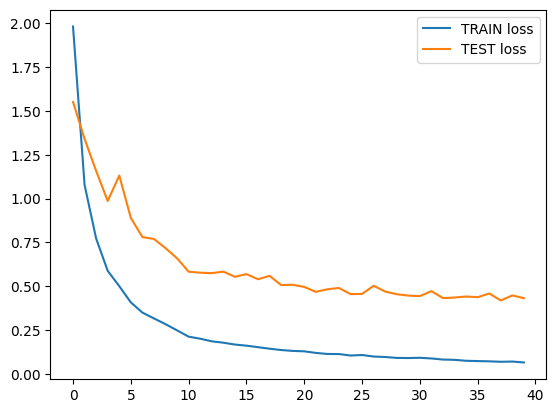

In [156]:
    
X = np.arange(len(train_losses))    
Y = train_losses
    
    
plt.plot(X, train_losses, label='TRAIN loss')
plt.plot(X, test_losses, label='TEST loss')
plt.legend()


plt.savefig('model_losses_with_35k_images.png')
plt.show()